The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.shape

(48204, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

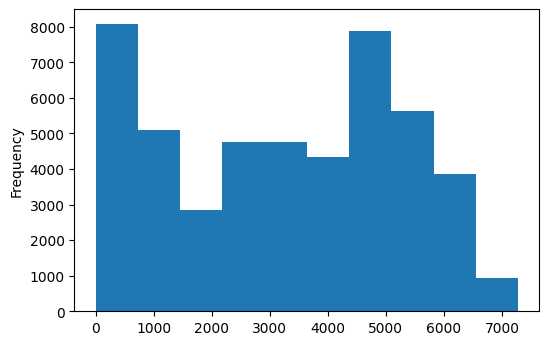

In [5]:
# Plot a histogram to visualize the distribution of the 'traffic_volume' column
df['traffic_volume'].plot.hist();

In [6]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

Divide the dataset into two parts:

> Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)

> Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [7]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [8]:
# Isolate the daytime data
day = df[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)].copy()
print(day.shape)

(23877, 9)


In [9]:
# Isolate the nighttime data
night = df[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7)].copy()
print(night.shape)

(24327, 9)


As seen above, there are some missing data samples.

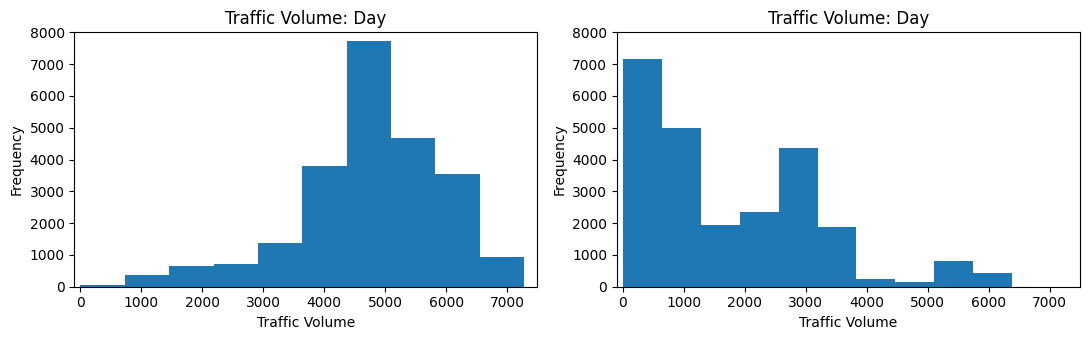

In [10]:
# Plot the histograms of traffic_volume for both day and night. Organize the two histograms side-by-side on a grid chart
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.tight_layout();

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

In [13]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

Generate a line plot to visualize how the traffic volume changed each month on average.?

In [15]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

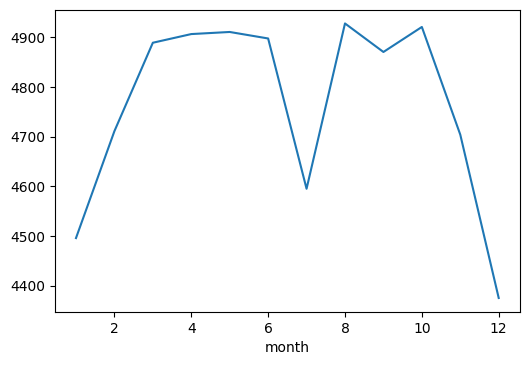

In [17]:
by_month['traffic_volume'].plot.line();

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July.

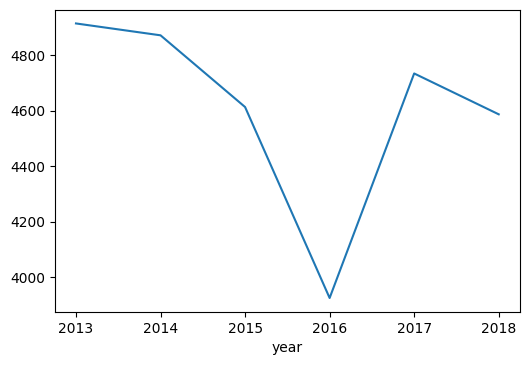

In [18]:
# Analyze the traffic volue for the 'July' month
day['year'] = day['date_time'].dt.year
july = day[day['month'] == 7]
july.groupby('year').mean()['traffic_volume'].plot.line();

There is a dip in the July traffic volume in 2016.

In [19]:
# Traffic volume averages for each day of the week
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

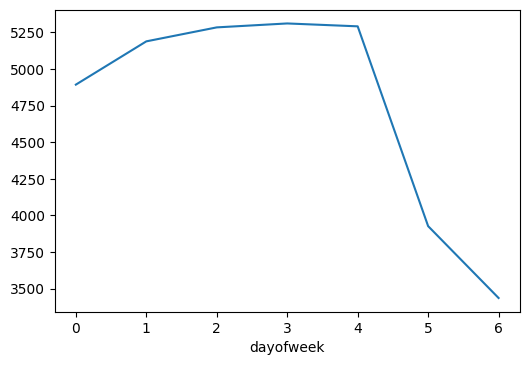

In [21]:
# Line plot to visualize how the traffic volume changed each day of the week on average
day.groupby('dayofweek').mean()['traffic_volume'].plot.line();

Traffic volume inceases from Monday till Friday and then drops for noth Saturday and Sunday.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [23]:
day['hour'] = day['date_time'].dt.hour
business_days = day[day['dayofweek'] <= 4].copy() # 4 == Friday
weekend = day[day['dayofweek'] >= 5].copy() # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


In [24]:
print(by_hour_business)

            temp   rain_1h   snow_1h  clouds_all  traffic_volume     month  \
hour                                                                         
7     278.662639  0.145105  0.000068   50.538983     6030.413559  6.363390   
8     278.938443  0.144614  0.000135   53.666441     5503.497970  6.567659   
9     279.628421  0.156829  0.000139   53.619709     4895.269257  6.484386   
10    280.664650  0.113984  0.000033   54.781417     4378.419118  6.481283   
11    281.850231  0.151976  0.000000   52.808876     4633.419470  6.448819   
12    282.832763  0.090271  0.001543   53.855714     4855.382143  6.569286   
13    283.292447  0.092433  0.000370   53.325444     4859.180473  6.465237   
14    284.091787  0.102991  0.000746   55.326531     5152.995778  6.588318   
15    284.450605  0.090036  0.000274   54.168467     5592.897768  6.541397   
16    284.399011  0.118180  0.000632   54.444132     6189.473647  6.580464   
17    284.263033  7.299358  0.000000   55.204960     5784.827133

In [25]:
print(by_hour_weekend)

            temp   rain_1h   snow_1h  clouds_all  traffic_volume     month  \
hour                                                                         
7     278.095331  0.291540  0.000000   50.006623     1589.365894  6.518212   
8     277.981017  0.083870  0.000083   48.877076     2338.578073  6.523256   
9     279.785660  0.075234  0.000364   49.688042     3111.623917  6.603120   
10    280.403811  0.079674  0.000103   48.915808     3686.632302  6.491409   
11    282.129355  0.141387  0.000000   52.372973     4044.154955  6.482883   
12    282.936119  0.095784  0.000000   51.418018     4372.482883  6.500901   
13    283.784951  0.180452  0.000000   53.095841     4362.296564  6.580470   
14    284.663261  0.087847  0.000000   52.735401     4358.543796  6.644161   
15    284.854578  0.074771  0.000000   52.148624     4342.456881  6.612844   
16    284.755487  0.145894  0.000000   53.630088     4339.693805  6.566372   
17    284.760020  0.135783  0.000000   53.064057     4151.919929

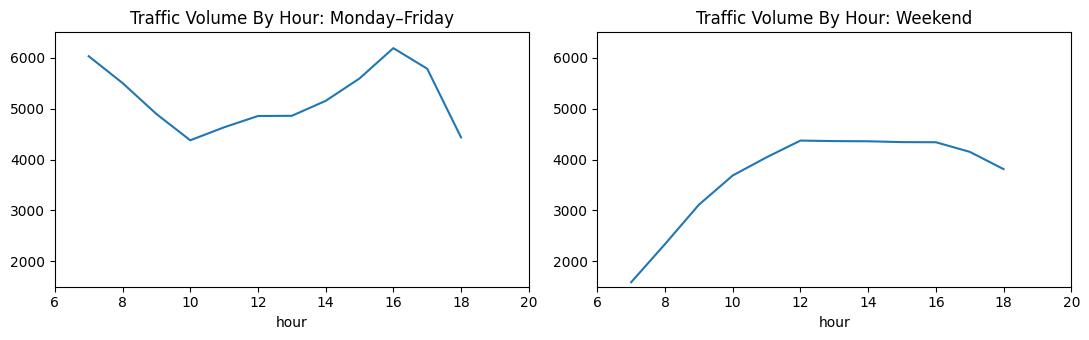

In [26]:
# Plot two line plots on a grid chart to visualize how the traffic volume changes by time of the day

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.tight_layout();

The traffic is usually heavier on business days compared to weekends. On business days, the rush hours are around 7 and 16.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description'.

In [29]:
# Find the correlation values between traffic_volume and the numerical weather columns.
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

'temp' variable shows the highest correlation with 'traffic_volume'.

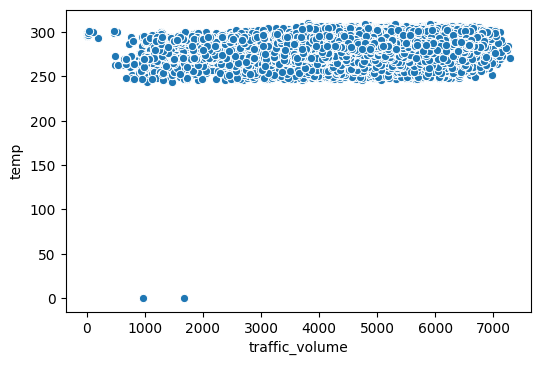

In [31]:
# Scatter plot 
sns.scatterplot(data = day, x = 'traffic_volume', y = 'temp');

As seen above, 'temo' does not look like a strong indicator of heay traffic.

We'll look next at the categorical weather-related columns: 'weather_main' and 'weather_description'.

In [32]:
# Calculate the average traffic volume associated with each unique value in these two columns.
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

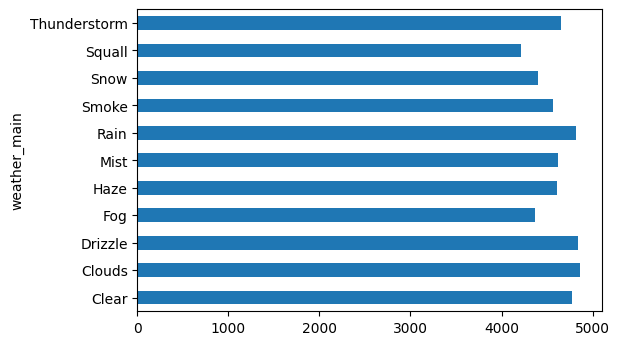

In [33]:
by_weather_main['traffic_volume'].plot.barh();

As seen above, no weather type where traffic volume exceeds 5,000 cars.

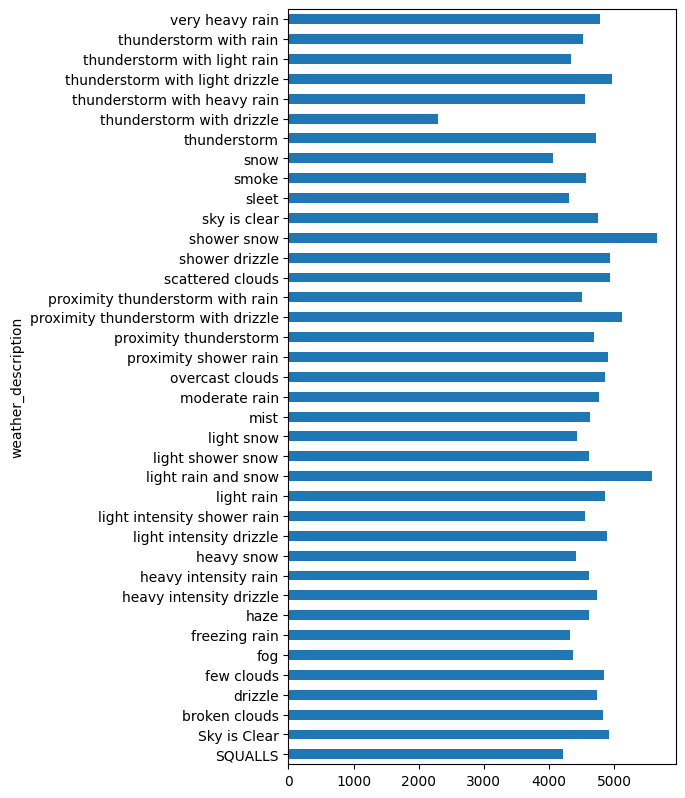

In [35]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10));

As seen above, there are three weather types where traffic volume exceeds 5,000:

Shower snow, Light rain and snow and Proximity thunderstorm with drizzle.

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

The traffic is usually heavier on business days compared to the weekends.

On business days, the rush hours are around 7 and 16.

* Weather indicators

Shower snow

Light rain and snow

Proximity thunderstorm with drizzle